In [ ]:
import torch
import numpy as np
import torch
import torch.nn as nn
from torchvision import transforms,models
import random
import json

class_idx = json.load(open("imagenet_class_index.json"))
class_names = [class_idx[str(k)][1] for k in range(len(class_idx))]

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def setup_seed(seed):
     torch.manual_seed(seed)
     torch.cuda.manual_seed_all(seed)
     random.seed(seed)
     torch.backends.cudnn.deterministic = True

setup_seed(3407)

In [2]:
model = models.inception_v3(pretrained=True)
model.eval()
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]
norm_layer = transforms.Normalize(mean, std)
sfmx = nn.Softmax(dim=-1)
model = nn.Sequential(norm_layer, model, sfmx).to(device)

/home/zhijin/Data/miniconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/zhijin/Data/miniconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


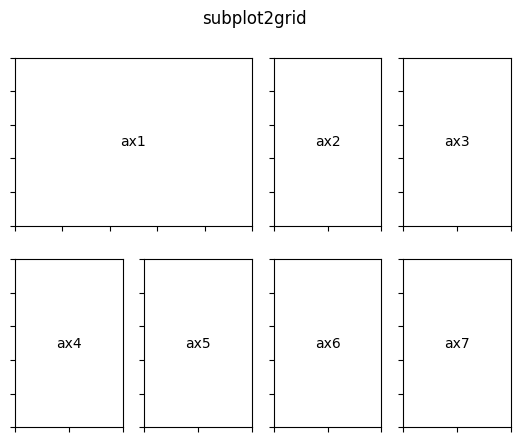

In [3]:
import matplotlib.pyplot as plt

def make_ticklabels_invisible(fig):
    for i, ax in enumerate(fig.axes):
        ax.text(0.5, 0.5, "ax%d" % (i+1), va="center", ha="center")
        for tl in ax.get_xticklabels() + ax.get_yticklabels():
            tl.set_visible(False)

plt.figure()
ax1 = plt.subplot2grid((2,4), (0,0), colspan=2)
ax2 = plt.subplot2grid((2,4), (0,2), colspan=1)
ax3 = plt.subplot2grid((2,4), (0,3), colspan=1)
ax4 = plt.subplot2grid((2,4), (1,0), colspan=1)
ax5 = plt.subplot2grid((2,4), (1,1), colspan=1)
ax6 = plt.subplot2grid((2,4), (1,2), colspan=1)
ax7 = plt.subplot2grid((2,4), (1,3), colspan=1)

plt.suptitle("subplot2grid")
make_ticklabels_invisible(plt.gcf())
plt.show()

In [4]:
percentile = 80
upperbound = 99
# input
def plot_img(plt, img,ex):
    pred = model(img.to(device)).argmax(-1).item()
    img = img.squeeze().cpu().numpy()
    plt.title("Pred:{}".format(class_names[pred]))
    ex = np.transpose(img, (1,2,0))
    plt.imshow(ex)
    return plt

# heatmap
def plot_hm(plt, img, ex):
    plt.title("Heatmap")
    ex = np.mean(ex, axis=0)
    q = np.percentile(ex, percentile)
    u = np.percentile(ex, upperbound)
    # q=0
    ex[ex<q] = q
    ex[ex>u] = u
    ex = (ex-q)/(u-q+1e-8)
    plt.imshow(ex, cmap='gray')

# input * heatmap
def plot_hm_img(plt, img, ex):
    # pred, img, ex = example
    plt.title("Input * heatmap")
    ex = np.expand_dims(np.mean(ex, axis=0), axis=0)
    q = np.percentile(ex, percentile)
    u = np.percentile(ex, upperbound)
    # q=0
    ex[ex<q] = q
    ex[ex>u] = u
    ex = (ex-q)/(u-q)
    ex = np.transpose(ex, (1,2,0))
    img = np.transpose(img, (1,2,0))

    img = img * ex
    plt.imshow(img)
    
def return_hm(ex):
    ex = np.mean(ex, axis=0)
    q = np.percentile(ex, percentile)
    u = np.percentile(ex, upperbound)
    # q=0
    ex[ex<q] = q
    ex[ex>u] = u
    ex = (ex-q)/(u-q+1e-8)
    return ex

def return_hm_img(img, ex):
    ex = np.expand_dims(np.mean(ex, axis=0), axis=0)
    q = np.percentile(ex, percentile)
    u = np.percentile(ex, upperbound)
    # q=0
    ex[ex<q] = q
    ex[ex>u] = u
    ex = (ex-q)/(u-q)
    ex = np.transpose(ex, (1,2,0))
    img = np.transpose(img, (1,2,0))

    img = img * ex
    return img

In [5]:
fast_ig_scores = np.load("scores_1/inception_v3_fast_ig_scores.npz")
guided_ig_scores = np.load("scores_1/inception_v3_guided_ig_scores.npz")
big_scores = np.load("scores_1/inception_v3_big_scores.npz")
agi_scores = np.load("scores_1/inception_v3_agi_scores.npz")
ig_scores = np.load("scores_1/inception_v3_ig_scores.npz")
deeplift_scores = np.load("scores_1/inception_v3_deeplift_scores.npz")
mfaba_scores = np.load("scores_1/inception_v3_mfaba_scores.npz")
attexplore_scores = np.load("scores_1/inception_v3_attexplore_scores.npz")
sg_scores = np.load("scores_1/inception_v3_sg_scores.npz")
sm_scores = np.load("scores_1/inception_v3_sm_scores.npz")
eg_scores = np.load("scores_1/inception_v3_eg_scores.npz")
la_scores = np.load("scores_1/inception_v3_la_scores.npz") # this file name maybe different, they may contain some parameter name and value.

In [6]:
ins_fast_ig = fast_ig_scores['ins'].mean(axis=1)
ins_guided_ig = guided_ig_scores['ins'].mean(axis=1)
ins_big = big_scores['ins'].mean(axis=1)
ins_agi = agi_scores['ins'].mean(axis=1)
ins_ig = ig_scores['ins'].mean(axis=1)
ins_deeplift = deeplift_scores['ins'].mean(axis=1)
ins_mfaba = mfaba_scores['ins'].mean(axis=1)
ins_attexplore = attexplore_scores['ins'].mean(axis=1)
ins_sg = sg_scores['ins'].mean(axis=1)
ins_sm = sm_scores['ins'].mean(axis=1)
ins_eg = eg_scores['ins'].mean(axis=1)
ins_la = la_scores['ins'].mean(axis=1)

In [7]:
attribution_fast_ig = np.load("attributions_1/inception_v3_fast_ig_attributions.npy")
attribution_guided_ig = np.load("attributions_1/inception_v3_guided_ig_attributions.npy")
attribution_big = np.load("attributions_1/inception_v3_big_attributions.npy")
attribution_agi = np.load("attributions_1/inception_v3_agi_attributions.npy")
attribution_ig = np.load("attributions_1/inception_v3_ig_attributions.npy")
attribution_deeplift = np.load("attributions_1/inception_v3_deeplift_attributions.npy")
attribution_mfaba = np.load("attributions_1/inception_v3_mfaba_attributions.npy")
attribution_attexplore = np.load("attributions_1/inception_v3_attexplore_attributions.npy")
attribution_sg = np.load("attributions_1/inception_v3_sg_attributions.npy")
attribution_sm = np.load("attributions_1/inception_v3_sm_attributions.npy")
attribution_eg = np.load("attributions_1/inception_v3_eg_attributions.npy")
attribution_la = np.load("attributions_1/inception_v3_la_attributions.npy") # this file name maybe different, they may contain some parameter name and value.

In [8]:
img_batch = torch.load("data/img_batch.pt")
target_batch = torch.load("data/label_batch.pt")

/tmp/ipykernel_3939043/1363840642.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  img_batch = torch.load("data/img_batch.pt")
/tmp/ipykernel_3939043/1363840642.py:2: Fut

In [9]:
def plot_all(img_batch,fast_ig_attr, guided_ig_attr, big_attr, agi_attr, ig_attr, \
             deeplift_attr, la_attr, mfaba_attr, attexplore_attr, sg_attr, sm_attr, eg_attr, idx=0):
    data = img_batch[idx]
    label = target_batch[idx]

    fast_ig_attr = fast_ig_attr[idx]
    guided_ig_attr = guided_ig_attr[idx]
    big_attr = big_attr[idx]
    agi_attr = agi_attr[idx]
    ig_attr = ig_attr[idx]
    deeplift_attr = deeplift_attr[idx]
    la_attr = la_attr[idx]
    mfaba_attr = mfaba_attr[idx]
    attexplore_attr = attexplore_attr[idx]
    sg_attr = sg_attr[idx]
    sm_attr = sm_attr[idx]
    eg_attr = eg_attr[idx]
    

    hm_fast_ig = return_hm(fast_ig_attr)
    hm_guided_ig = return_hm(guided_ig_attr)
    hm_big = return_hm(big_attr)
    hm_agi = return_hm(agi_attr)
    hm_ig = return_hm(ig_attr)
    hm_deeplift = return_hm(deeplift_attr)
    hm_la = return_hm(la_attr)
    hm_mfaba = return_hm(mfaba_attr)
    hm_attexplore = return_hm(attexplore_attr)
    hm_sg = return_hm(sg_attr)
    hm_sm = return_hm(sm_attr)
    hm_eg = return_hm(eg_attr)
    
    plt.figure(figsize=(15,10))
    ax1 = plt.subplot2grid((2,7), (0,0), colspan=2)
    ax2 = plt.subplot2grid((2,7), (0,2), colspan=1)
    ax3 = plt.subplot2grid((2,7), (0,3), colspan=1)
    ax4 = plt.subplot2grid((2,7), (0,4), colspan=1)
    ax5 = plt.subplot2grid((2,7), (0,5), colspan=1)
    ax6 = plt.subplot2grid((2,7), (0,6), colspan=1)
    ax7 = plt.subplot2grid((2,7), (1,0), colspan=1)
    ax8 = plt.subplot2grid((2,7), (1,1), colspan=1)
    ax9 = plt.subplot2grid((2,7), (1,2), colspan=1)
    ax10 = plt.subplot2grid((2,7), (1,3), colspan=1)
    ax11 = plt.subplot2grid((2,7), (1,4), colspan=1)
    ax12 = plt.subplot2grid((2,7), (1,5), colspan=1)
    ax13 = plt.subplot2grid((2,7), (1,6), colspan=1)
     
    ax1.imshow(data.cpu().numpy().transpose(1,2,0))
    ax1.yaxis.set_visible(False)
    ax1.set_xlabel('Prediction: {}'.format(class_names[target_batch[idx]]),weight='bold',size=15)
    ax1.set_xticks([])
    
    
    for ax, title, hm in zip([ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13], \
                    ['LA', 'AGI', 'AttEXplore', 'BIG', 'DeepLIFT', 'EG', 'FIG', 'GIG', 'IG', 'MFABA', 'SG', 'SM' ], \
                    [hm_la, hm_agi, hm_attexplore, hm_big, hm_deeplift, hm_eg, hm_fast_ig, hm_guided_ig, hm_ig, hm_mfaba, hm_sg, hm_sm]):
        ax.set_xlabel(title,weight='bold',size=15)
        ax.set_xticks([])
        ax.yaxis.set_visible(False)
        ax.imshow(hm,cmap='gray')
    
    plt.subplots_adjust(hspace=-0.5)
    plt.show()
    

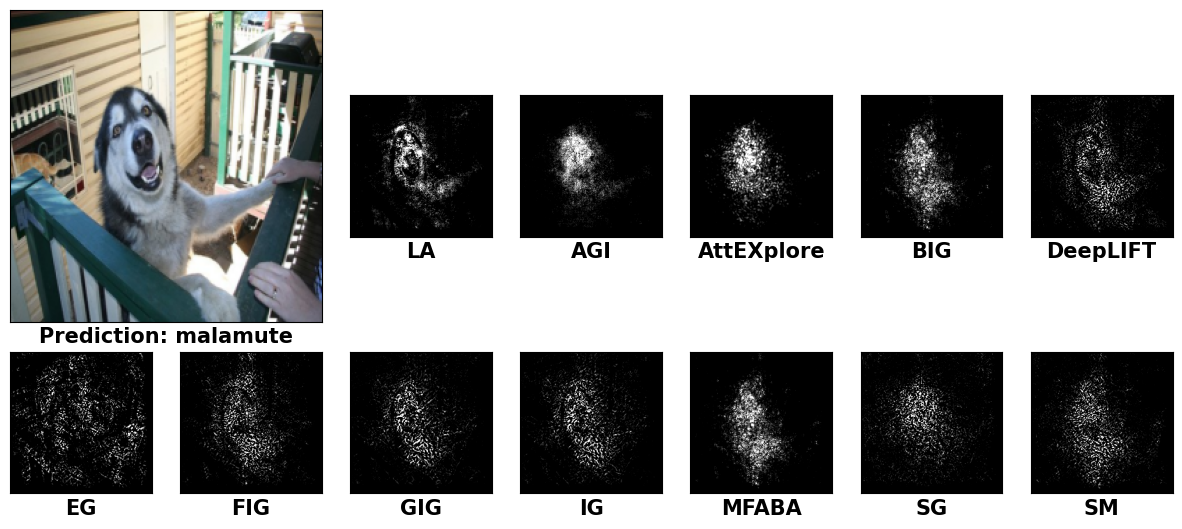

0


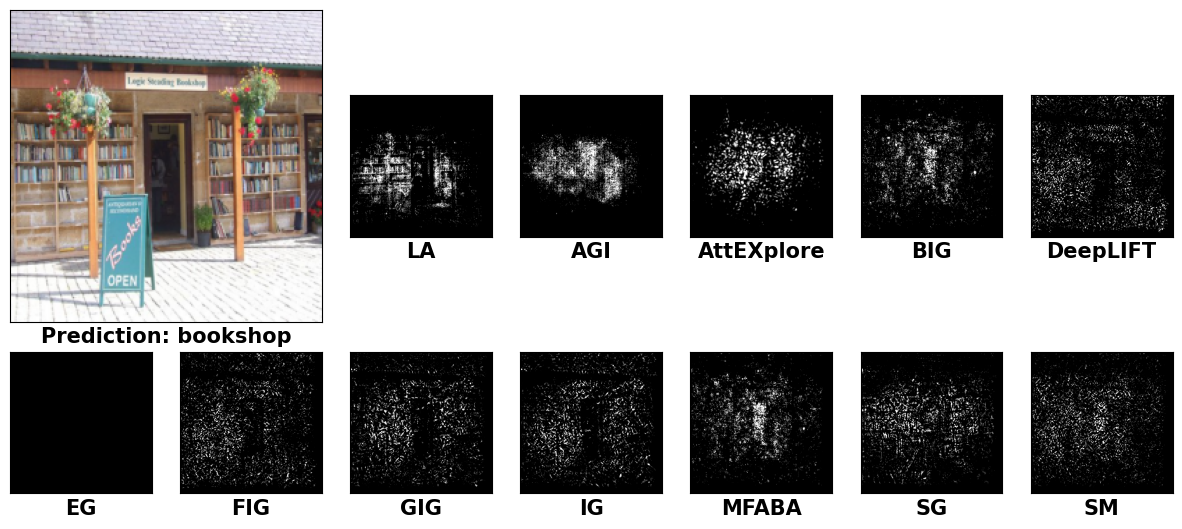

1


In [10]:
for i in range(0,2): # adjust this for more attribution results, eg. range(0,10)
    plot_all(img_batch,attribution_fast_ig,attribution_guided_ig,attribution_big,attribution_agi,attribution_ig,attribution_deeplift,\
                attribution_la,attribution_mfaba,attribution_attexplore,attribution_sg,attribution_sm,attribution_eg
        ,idx=i)
    print(i)